In [2]:
%run prep_environment.py

* Total de assinantes que fizeram view em conteúdo nos últimos 30 dias
* Total de assinantes que fizeram view em conteúdo nos últimos 30 dias e que assinaram em cada mês
* Total de assinantes que fizeram view em conteúdo nos últimos 30 dias e que se cadastraram em cada mês
* Quantos dos primeiros 7 dias de assinatura eles usaram
* Quantas vezes deu locked_content nos 7 dias anteriores a assinatura
* Quantos dias usou nos últimos 7 dias antes da assinatura
* Quantos dos primeiros 7 dias de cadastro eles usaram (apenas para os que se cadastraram de outubro para cá)
* Quantos assinaram até 7 dias depois do cadastro

In [ ]:
sql = """select distinct out19.id, count(DISTINCT TRUNC(root_tstamp)) as qtd_7_primeiros_dias_cadastro 
from public.t_user_app_session AS aps
INNER JOIN public.cadastrados_out19_sem_churn_view_30d AS out19 ON out19.id = aps.user_id 
                                                                AND trunc(dt_inicio_assinatura) <= '2019-10-31'
                                                                AND trunc(root_tstamp) BETWEEN trunc(data_cadastro) AND trunc(dateadd(DAY,6,data_cadastro))
GROUP BY out19.id"""

In [ ]:
df1 = pd.read_sql_query(text(sql), engine)
df = df1.copy()

In [ ]:
df.describe()

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='qtd_7_primeiros_dias_cadastro',data=df);

In [ ]:
sql = """select distinct out19.id, count(DISTINCT TRUNC(root_tstamp)) as qtd_7_primeiros_dias_assinatura
from public.t_user_app_session AS aps
INNER JOIN public.cadastrados_out19_sem_churn_view_30d AS out19 ON out19.id = aps.user_id 
                                                                AND trunc(dt_inicio_assinatura) <= '2019-10-31'
                                                                AND trunc(root_tstamp) BETWEEN trunc(dt_inicio_assinatura) AND trunc(dateadd(DAY,6,dt_inicio_assinatura))
GROUP BY out19.id"""

In [ ]:
df2 = pd.read_sql_query(text(sql), engine)
df = df2.copy()

In [ ]:
df.describe()

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='qtd_7_primeiros_dias_assinatura',data=df);

In [ ]:
sql = """SELECT DISTINCT user_id,count(DISTINCT root_id) as qtd_locked_content
FROM 
public.t_user_button_click AS bc
INNER JOIN public.cadastrados_out19_sem_churn_view_30d AS out19 ON out19.id = bc.user_id 
                                                                AND trunc(dt_inicio_assinatura) <= '2019-10-31'
                                                                AND trunc(bc.root_tstamp) BETWEEN trunc(data_cadastro) AND trunc(dateadd(DAY,6,data_cadastro))
GROUP BY user_id"""

In [ ]:
df3 = pd.read_sql_query(text(sql), engine)
df = df3.copy()

In [ ]:
df.describe()

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='qtd_locked_content',data=df);

In [ ]:
sql = """SELECT DISTINCT id,count(distinct view_date) as qtd_dias_view_content
FROM 
public.cadastrados_out19_sem_churn_view_30d
where trunc(dt_inicio_assinatura) <= '2019-10-31'
GROUP BY id"""

In [ ]:
df4 = pd.read_sql_query(text(sql), engine)
df = df4.copy()

In [ ]:
df.describe()

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='qtd_dias_view_content',data=df);

### Carga da base : 08/07/2020
#### Período avaliado : outubro/2019

In [19]:
sql = """select * from public.t_hypothesis_test_reforge"""
df1 = pd.read_sql_query(text(sql), engine)
df = df1.copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93192 entries, 0 to 93191
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        93192 non-null  int64  
 1   signup_date                    93192 non-null  object 
 2   first_subscription_date        93192 non-null  object 
 3   last_subscription_start        93192 non-null  object 
 4   flag_signup_oct19              93192 non-null  int64  
 5   flag_first_subscription_oct19  1689 non-null   float64
 6   flag_last_subscription_oct19   93192 non-null  int64  
 7   flag_view_30d                  93192 non-null  int64  
 8   qtd_view_30d                   87157 non-null  float64
 9   flag_locked_content            93192 non-null  int64  
 10  qtd_locked_content             3314 non-null   float64
 11  qt_sessions_7d_subs            42331 non-null  float64
 12  qt_sessions_30d_subs           42765 non-null 

In [21]:
df.describe()

,user_id,flag_signup_oct19,flag_first_subscription_oct19,flag_last_subscription_oct19,flag_view_30d,qtd_view_30d,flag_locked_content,qtd_locked_content,qt_sessions_7d_subs,qt_sessions_30d_subs,qt_sessions_7d_signup,qt_sessions_30d_signup,flag_nao_churneou
count,93192.00,93192.00,1689.00,93192.00,93192.00,87157.00,93192.00,3314.00,42331.00,42765.00,7792.00,8353.00,93192.00
mean,296853.76,0.01,1.00,0.00,0.94,13.42,0.04,6.01,4.03,14.13,3.24,10.57,0.48
std,210018.01,0.09,0.00,0.07,0.25,7.22,0.19,9.86,1.76,6.99,1.75,6.90,0.50
min,36.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,131378.75,0.00,1.00,0.00,1.00,8.00,0.00,1.00,3.00,9.00,2.00,5.00,0.00
50%,238552.00,0.00,1.00,0.00,1.00,13.00,0.00,3.00,4.00,14.00,3.00,9.00,0.00
75%,440765.75,0.00,1.00,0.00,1.00,19.00,0.00,6.75,5.00,20.00,5.00,16.00,1.00
max,861223.00,1.00,1.00,1.00,1.00,30.00,1.00,190.00,7.00,30.00,7.00,30.00,1.00


In [22]:
df = df.fillna(0.0)

Quantos assinantes fizeram view em conteúdo nos últimos 30 dias?

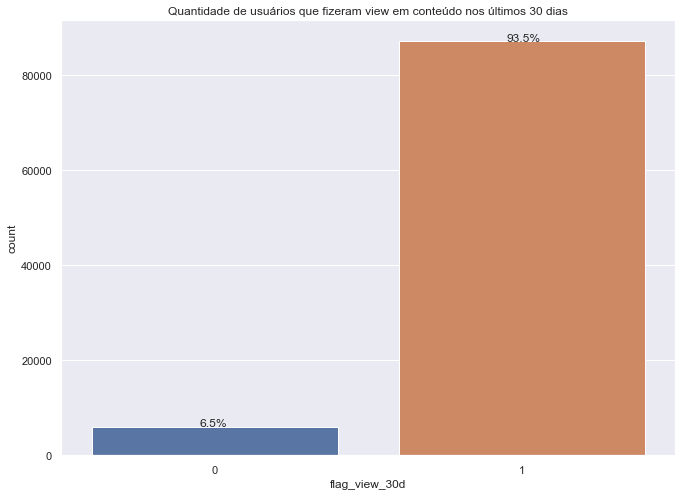

In [23]:
fig_dims= (11, 8)
fig = plt.subplots(figsize=fig_dims) 
ax = sns.countplot(x="flag_view_30d", data=df)
plt.title('Quantidade de usuários que fizeram view em conteúdo nos últimos 30 dias')

total = len(df['flag_view_30d'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.05
        y = p.get_y() + p.get_height() + 2
        ax.annotate(percentage, (x, y))

plt.show();

### Hipótese 1
    Utilização durante X dos 7 dias do período de trial

Total de assinantes que fizeram view em conteúdo 

In [24]:
df[(df.flag_view_30d==1)]['user_id'].count()

87157

In [9]:
import datetime

In [26]:
df.last_subscription_start = pd.to_datetime(df.last_subscription_start)

In [27]:
df.first_subscription_date = pd.to_datetime(df.first_subscription_date)

Dos assinantes que fizeram view em conteúdo, quantos conseguimos avaliar o comportamento imediatamente início de assinatura e que não churnearam desde então? Obs.: usamos outubro/2019 até a presente data, pois foi quando o snowplow ficou melhor consolidado.

In [28]:
df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)&(df.flag_nao_churneou==1)].user_id.count()

1930

Quantos % dos assinantes ativos hoje, que iniciaram assinatura em outubro de 2019 deram churn desde então?

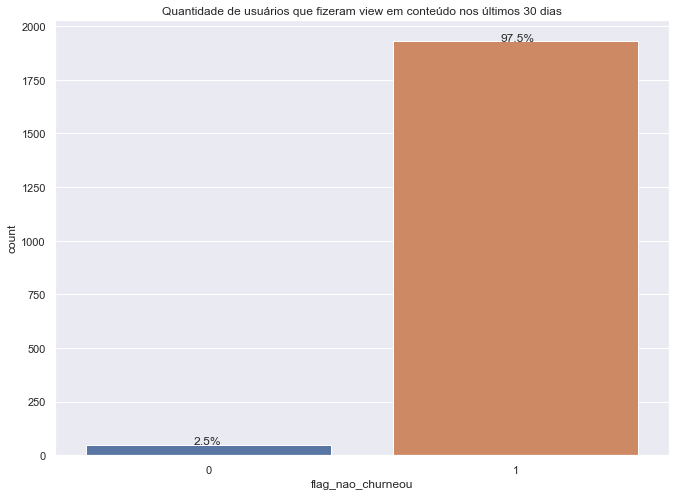

In [29]:
fig_dims= (11, 8)
fig = plt.subplots(figsize=fig_dims) 
ax = sns.countplot(x="flag_nao_churneou", data=df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)])
plt.title('Quantidade de usuários que fizeram view em conteúdo nos últimos 30 dias')

total = len(df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.05
        y = p.get_y() + p.get_height() + 2
        ax.annotate(percentage, (x, y))

plt.show();

Quantos % deles estavam assinando pela primeira vez?

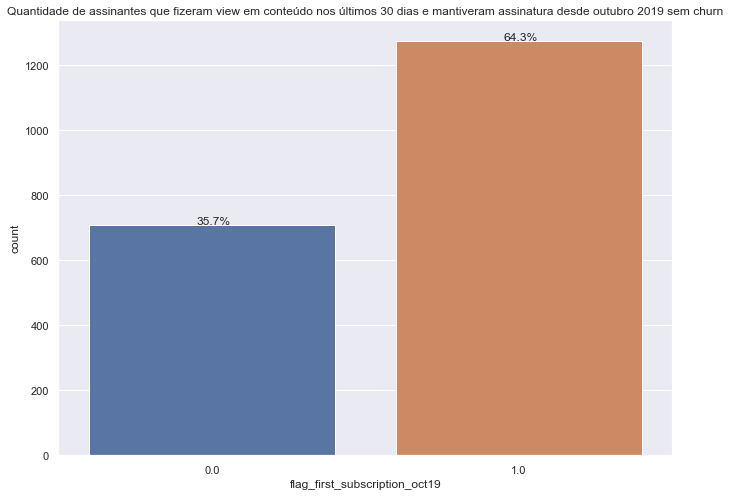

In [30]:
fig_dims= (11, 8)
fig = plt.subplots(figsize=fig_dims) 
ax = sns.countplot(x="flag_first_subscription_oct19", data=df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)])
plt.title('Quantidade de assinantes que fizeram view em conteúdo nos últimos 30 dias e mantiveram assinatura desde outubro 2019 sem churn')

total = len(df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 - 0.05
        y = p.get_y() + p.get_height() + 2
        ax.annotate(percentage, (x, y))

plt.show();

In [31]:
df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)].describe()

,user_id,flag_signup_oct19,flag_first_subscription_oct19,flag_last_subscription_oct19,flag_view_30d,qtd_view_30d,flag_locked_content,qtd_locked_content,qt_sessions_7d_subs,qt_sessions_30d_subs,qt_sessions_7d_signup,qt_sessions_30d_signup,flag_nao_churneou
count,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00,1980.00
mean,314347.82,0.09,0.64,0.21,1.00,13.78,0.06,0.51,4.20,15.79,0.48,1.93,0.97
std,201295.99,0.29,0.48,0.40,0.00,7.51,0.23,3.79,1.81,6.82,1.39,5.43,0.16
min,91.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,149656.25,0.00,0.00,0.00,1.00,8.00,0.00,0.00,3.00,11.00,0.00,0.00,1.00
50%,270755.50,0.00,1.00,0.00,1.00,14.00,0.00,0.00,4.00,16.00,0.00,0.00,1.00
75%,490372.25,0.00,1.00,0.00,1.00,20.00,0.00,0.00,6.00,21.00,0.00,0.00,1.00
max,795025.00,1.00,1.00,1.00,1.00,30.00,1.00,85.00,7.00,30.00,7.00,29.00,1.00


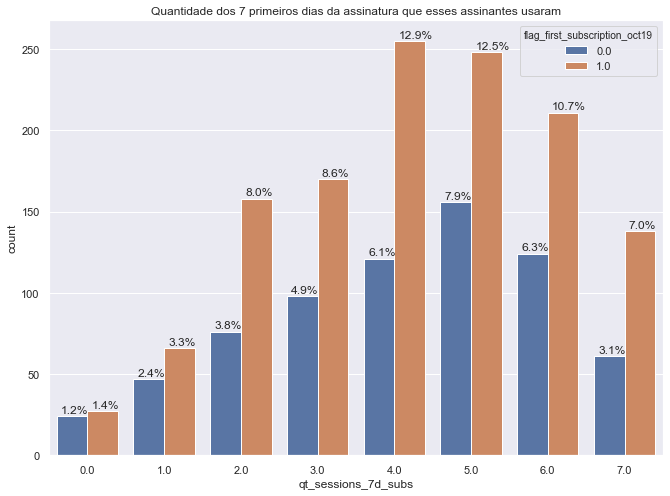

In [38]:
fig_dims= (11, 8)
fig = plt.subplots(figsize=fig_dims) 
ax = sns.countplot(x='qt_sessions_7d_subs',hue= df.flag_first_subscription_oct19,data=df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)])
plt.title('Quantidade dos 7 primeiros dias da assinatura que esses assinantes usaram')

total = len(df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/7 
        y = p.get_y() + p.get_height() + 2
        ax.annotate(percentage, (x, y))

plt.show();

Resumo descritivo para esse grupo de usuários :
* Mediana de 4 dias de acesso dos 7 primeiros dias de assinatura
* Mediana de 16 dias de acesso dos 30 primeiros dias de assinatura
* Mediana de 4 dias de acesso dos 7 primeiros dias de assinatura
* Nos últimos 30 dias fizeram view em conteúdo em média em 14 dias diferentes
* 35.7% deles estavam assinando pela primeira vez
* 97.5% deles não churnearam desde a última assinatura (começando em 10/2019)
* Comportamento parecido nos primeiros 7 dias tanto para quem assinava pela primeira vez, quanto para quem já havia assinado antes. Ambos acessam em grande partede 4 a 6 dias

In [42]:
import chart_studio as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=False)
init_notebook_mode(connected=True)

In [92]:
df_hipotese1 = df[(df.flag_view_30d==1)&(df.last_subscription_start.dt.month == 10)&(df.last_subscription_start.dt.year == 2019)&(df.qt_sessions_7d_subs >=1)]

In [69]:
df_hipotese1['percentage_last_30_days'] = df_hipotese1.qtd_view_30d/30
df_hipotese1['percentage_first_7_days'] = df_hipotese1.qt_sessions_7d_subs/7


In [95]:
df_hipotese1.iplot(
    x='qt_sessions_7d_subs',
    y='qtd_view_30d',
    mode='markers',
    size = df_hipotese1.groupby('qtd_view_30d').count().user_id,
    layout=dict(
        xaxis=dict(title='Sessões nos primeiros 7 dias de assinatura'),
        yaxis=dict(title='Views em conteúdo nos últimos 30 dias'),
        title='Sessões nos primeiros 7 dias de assinatura vs Views em conteúdo nos últimos 30 dias'))

In [84]:
df_hipotese1[df_hipotese1.qt_sessions_7d_subs>=1].pivot(
    columns='qt_sessions_7d_subs', values='qtd_view_30d').iplot(
        kind='box', colorscale='set2',
        xTitle='Quantidade de dias que acessou na primeira semana de assinatura',
        yTitle='Quantidade de dias que fez view nos últimos 30 dias',
        title='Box Plot de sessões na primeira semana de assinatura vs views nos últimos 30 dias')